In [1]:
import numpy as np
from sklearn import svm,datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
#Function to plot the results
def plot_predictions(classifier):
    #Generating data for the prediction
    xx,yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
    
    #Making predictions for flatted array
    predictions = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    predictions = predictions.reshape(xx.shape)
    
    fig = plt.figure(figsize=(5,5))
    
    #Plotting prediction area
    plt.contourf(xx,yy,predictions,cmap=plt.cm.Paired_r,alpha=0.6)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel('Distance from bump')
    plt.ylabel('Hight of the bump')
    plt.show()
    

In [3]:
N_SAMPLES = 2000
#Function to generate data
def generate_data():
    #Generating random data
    centers = [(0.9,0.05),(0.05,0.94)]
    X,y = make_blobs(n_samples=N_SAMPLES,n_features=2,
                     cluster_std=0.4,centers=centers,
                     shuffle=False,random_state=42)
    #Filtering the data which lies between [0,1]
    features = []
    labels = []

    for feature,label in zip(X,y):
        if feature[0]>=0 and feature[0]<=1 and feature[1]>=0 and feature[1]<=1:
            features.append(feature)
            labels.append(label)

    #Converting the data to numpy array
    X = np.array(features)
    y = np.array(labels)

    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel('Distance from bump')
    plt.ylabel('Height of the bump')
    plt.show()
    return X,y

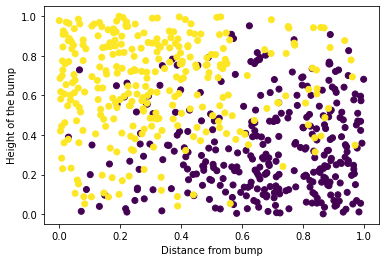

In [4]:
X,y = generate_data()

In [5]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [6]:
svm_classifier.fit(X,y)

SVC(kernel='linear')

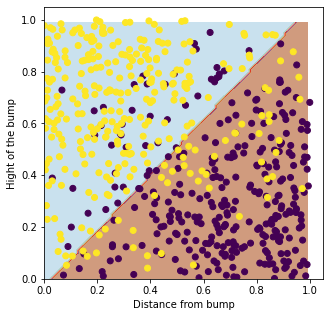

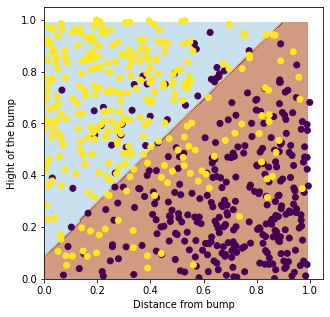

In [7]:
#With SVM
plot_predictions(svm_classifier)

#With NB
nb_classifier = MultinomialNB().fit(X,y)
plot_predictions(nb_classifier)

In [8]:
print(svm_classifier.predict([[.4,.5]]))

[1]


In [9]:
### Cross validation

#calculation n-fold caculation score
fold_score = cross_val_score(svm_classifier,X,y,cv=5)
print(fold_score)
print(np.mean(fold_score))

[0.87804878 0.83739837 0.82926829 0.82786885 0.81967213]
0.8384512861522058


In [10]:
### Hyper parameter tuning

In [11]:
param_grid = dict(gamma=[0,0.5,1.0,2.0,3.0,10.0,100.0,1000.0])
svm_classifier = svm.SVC(kernel='rbf')

#Grid search cross validation
grid = GridSearchCV(svm_classifier,param_grid=param_grid,cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'gamma': [0, 0.5, 1.0, 2.0, 3.0, 10.0, 100.0, 1000.0]})

In [12]:
print('The best parameters are %s with a score of %0.2f'%(grid.best_params_['gamma'],grid.best_score_))

The best parameters are 100.0 with a score of 0.84


In [15]:
classifier = svm.SVC(kernel='rbf',gamma=100)
classifier.fit(X,y)

SVC(gamma=100)

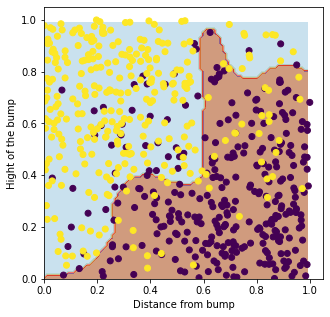

[0.86178862 0.86178862 0.8699187  0.82786885 0.78688525]
0.8416500066640011


In [16]:
plot_predictions(classifier)
fold_score = cross_val_score(classifier,X,y,cv=5)
print(fold_score)
print(np.mean(fold_score))